#### Data Clean for housing statistics for all condos in DC

- Data is pre-cleaned as floats for all variable with a time variable
- Data is saved in "data" folder as house_preclean_data.csv

In [3]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
%matplotlib inline

In [2]:
# Create a time variable
time_frame = pd.date_range('2010-01-01','2019-11-01', 
              freq='MS').strftime("%Y-%b").tolist()

df_temp = pd.DataFrame(time_frame, columns = ['Time'])
df = pd.read_csv("../../data/data_crosstab_condo.csv",  encoding='utf-16', sep='\t' )

In [3]:
# reformat all housing variables from string to float

df_temp["Median Sale Price"] = df["Median Sale Price"].str.replace(",", "").str.replace("$", "").str.replace("K","000").astype(float)
df_temp["Median Sale Price MoM"] = df["Median Sale Price MoM "].str.replace(",", "").str.replace("$", "").str.replace("%", "").str.replace("K","000").astype(float)
#df_temp["Median Sale Price YoY"] = df["Median Sale Price YoY "].str.replace(",", "").str.replace("$", "").str.replace("%", "").str.replace("K","000").astype(float)

df_temp["Homes Sold"] = df["Homes Sold"].str.replace(",", "").str.replace("$", "").str.replace("K","000").astype(float)
df_temp["Homes Sold MoM"] = df["Homes Sold MoM "].str.replace(",", "").str.replace("$", "").str.replace("%", "").str.replace("K","000").astype(float)
#df_temp["Homes Sold YoY"] = df["Homes Sold YoY "].str.replace(",", "").str.replace("$", "").str.replace("%", "").str.replace("K","000").astype(float)

df_temp["New Listings"] = df["New Listings"].str.replace(",", "").str.replace("$", "").str.replace("K","000").astype(float)
df_temp["New Listings MoM"] = df["New Listings MoM "].str.replace(",", "").str.replace("$", "").str.replace("%", "").str.replace("K","000").astype(float)
#df_temp["New Listings YoY"] = df["New Listings YoY "].str.replace(",", "").str.replace("$", "").str.replace("%", "").str.replace("K","000").astype(float)

df_temp["Inventory"] = df["Inventory"].str.replace(",", "").str.replace("$", "").str.replace("K","000").astype(float)
df_temp["Inventory MoM"] = df["Inventory MoM "].str.replace(",", "").str.replace("$", "").str.replace("%", "").str.replace("K","000").astype(float)
#df_temp["Inventory YoY"] = df[" Inventory YoY "].str.replace(",", "").str.replace("$", "").str.replace("%", "").str.replace("K","000").astype(float)

df_temp["Days on Market"] = df["Days on Market"]
df_temp["Days on Market MoM"] = df["Days on Market MoM"]
#df_temp["Days on Market YoY"] = df["Days on Market YoY"]



df_temp["Average Sale To List%"] = df["Average Sale To List"].str.replace(",", "").str.replace("%", "").str.replace("K","000").astype(float)
df_temp["Average Sale To List MoM"] = df["Average Sale To List MoM "].str.replace(",", "").str.replace("%", "").str.replace("K","000").astype(float)
#df_temp["Average Sale To List YoY"] = df["Average Sale To List YoY "].str.replace(",", "").str.replace("$", "").str.replace("%", "").str.replace("K","000").astype(float)


In [4]:
df = []
df = df_temp[1:118]
df.to_csv("../../data/house_preclean_data.csv", index = False)

In [5]:
df

,Time,Median Sale Price,Median Sale Price MoM,Homes Sold,Homes Sold MoM,New Listings,New Listings MoM,Inventory,Inventory MoM,Days on Market,Days on Market MoM,Average Sale To List%,Average Sale To List MoM
1,2010-Feb,250000.0,11.1,521.0,-3.9,1085.0,-2.3,3346.0,6.5,51,-5.0,98.2,0.4
2,2010-Mar,237000.0,-5.2,786.0,50.9,1681.0,54.9,3670.0,9.7,42,-9.0,98.2,0.0
3,2010-Apr,260000.0,9.7,909.0,15.6,1719.0,2.3,3892.0,6.0,28,-14.0,98.1,-0.1
4,2010-May,250000.0,-3.8,988.0,8.7,1029.0,-40.1,3874.0,-0.5,30,2.0,98.0,-0.1
5,2010-Jun,240000.0,-4.0,962.0,-2.6,1260.0,22.4,3907.0,0.9,35,5.0,98.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,2019-Jun,325000.0,2.5,1089.0,-9.3,1162.0,-20.2,1752.0,0.2,20,0.0,99.8,-0.1
114,2019-Jul,318000.0,-2.2,1094.0,0.5,1172.0,0.9,1694.0,-3.3,22,2.0,100.0,0.1
115,2019-Aug,300000.0,-5.7,1074.0,-1.8,972.0,-17.1,1540.0,-9.1,25,3.0,99.7,-0.3
116,2019-Sep,315000.0,5.0,888.0,-17.3,1218.0,25.3,1692.0,9.9,25,0.0,99.4,-0.3


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 1 to 117
Data columns (total 13 columns):
Time                        117 non-null object
Median Sale Price           117 non-null float64
Median Sale Price MoM       117 non-null float64
Homes Sold                  117 non-null float64
Homes Sold MoM              117 non-null float64
New Listings                117 non-null float64
New Listings MoM            117 non-null float64
Inventory                   117 non-null float64
Inventory MoM               117 non-null float64
Days on Market              117 non-null int64
Days on Market MoM          117 non-null float64
Average Sale To List%       117 non-null float64
Average Sale To List MoM    117 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 12.0+ KB


In [7]:
df.describe()

,Median Sale Price,Median Sale Price MoM,Homes Sold,Homes Sold MoM,New Listings,New Listings MoM,Inventory,Inventory MoM,Days on Market,Days on Market MoM,Average Sale To List%,Average Sale To List MoM
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,278931.623932,0.411111,860.025641,1.801709,1081.871795,3.063248,2298.461538,-0.200855,33.529915,-0.264957,98.588889,0.013675
std,27028.633124,4.084427,184.515043,16.299090,281.746142,26.412225,628.295512,7.784550,13.159219,7.568530,0.686166,0.274461
min,213000.000000,-8.300000,513.000000,-34.500000,464.000000,-40.100000,1387.000000,-24.600000,12.000000,-26.000000,97.100000,-0.600000
25%,260000.000000,-2.300000,724.000000,-9.000000,891.000000,-16.800000,1814.000000,-5.000000,23.000000,-4.000000,98.200000,-0.200000
50%,288000.000000,0.000000,844.000000,1.600000,1086.000000,-3.100000,2182.000000,-0.400000,30.000000,1.000000,98.700000,0.000000
75%,299000.000000,3.200000,1001.000000,12.100000,1265.000000,14.400000,2663.000000,5.700000,43.000000,4.000000,99.100000,0.200000
max,330000.000000,11.100000,1253.000000,50.900000,1719.000000,78.900000,3907.000000,19.500000,75.000000,20.000000,100.000000,0.700000


####  Set up transformed variables for housing statistics

In [3]:
df = pd.read_csv("../../data/house_preclean_data.csv")
df1 = pd.read_csv("../../data/macro.csv")

In [4]:
df

,Time,Median Sale Price,Median Sale Price MoM,Homes Sold,Homes Sold MoM,New Listings,New Listings MoM,Inventory,Inventory MoM,Days on Market,Days on Market MoM,Average Sale To List%,Average Sale To List MoM
0,2010-Feb,250000.0,11.1,521.0,-3.9,1085.0,-2.3,3346.0,6.5,51,-5.0,98.2,0.4
1,2010-Mar,237000.0,-5.2,786.0,50.9,1681.0,54.9,3670.0,9.7,42,-9.0,98.2,0.0
2,2010-Apr,260000.0,9.7,909.0,15.6,1719.0,2.3,3892.0,6.0,28,-14.0,98.1,-0.1
3,2010-May,250000.0,-3.8,988.0,8.7,1029.0,-40.1,3874.0,-0.5,30,2.0,98.0,-0.1
4,2010-Jun,240000.0,-4.0,962.0,-2.6,1260.0,22.4,3907.0,0.9,35,5.0,98.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,2019-Jun,325000.0,2.5,1089.0,-9.3,1162.0,-20.2,1752.0,0.2,20,0.0,99.8,-0.1
113,2019-Jul,318000.0,-2.2,1094.0,0.5,1172.0,0.9,1694.0,-3.3,22,2.0,100.0,0.1
114,2019-Aug,300000.0,-5.7,1074.0,-1.8,972.0,-17.1,1540.0,-9.1,25,3.0,99.7,-0.3
115,2019-Sep,315000.0,5.0,888.0,-17.3,1218.0,25.3,1692.0,9.9,25,0.0,99.4,-0.3


In [14]:
df1

,DATE,WDXRSA,US_UR,DMV_UR,DC_UR,FED_EM,FIN_EM,HOS_EM,DC_PER,DMV_PER,DMV_PER_1
0,2010-02-01,180.451677,9.8,6.9,9.7,373.444291,96.646081,254.227222,60.0,1447.651302,821.847524
1,2010-03-01,179.886193,9.9,6.7,9.5,373.911092,96.916094,258.398701,27.0,1194.393163,732.449501
2,2010-04-01,181.982940,9.9,6.1,9.4,375.438325,96.709393,262.204679,166.0,1240.543680,792.792527
3,2010-05-01,182.983985,9.6,6.3,9.3,384.432209,96.954287,259.995404,15.0,1068.784557,646.662505
4,2010-06-01,183.939947,9.4,6.5,9.3,383.827749,97.197389,261.043229,8.0,1167.185307,768.646617
...,...,...,...,...,...,...,...,...,...,...,...
112,2019-06-01,232.112524,3.7,3.4,5.6,363.193444,103.253989,347.332822,389.0,2036.740005,1178.709018
113,2019-07-01,232.032415,3.7,3.3,5.6,363.391729,102.106994,347.357406,455.0,2056.199932,1138.927749
114,2019-08-01,232.650097,3.7,3.2,5.5,364.342848,102.964051,350.489560,437.0,2000.434352,1247.029523
115,2019-09-01,233.380305,3.5,2.9,5.4,363.321499,102.012584,352.846320,329.0,2083.453745,1429.372493


In [ ]:
df = pd.concat([df, df1], axis = 1, sort = False)

In [5]:
df.to_csv("../../data/full_data.csv", index = False)

In [6]:
df

,Time,Median Sale Price,Median Sale Price MoM,Homes Sold,Homes Sold MoM,New Listings,New Listings MoM,Inventory,Inventory MoM,Days on Market,...,WDXRSA,US_UR,DMV_UR,DC_UR,FED_EM,FIN_EM,HOS_EM,DC_PER,DMV_PER,DMV_PER_1
0,2010-Feb,250000.0,11.1,521.0,-3.9,1085.0,-2.3,3346.0,6.5,51,...,180.451677,9.8,6.9,9.7,373.444291,96.646081,254.227222,60.0,1447.651302,821.847524
1,2010-Mar,237000.0,-5.2,786.0,50.9,1681.0,54.9,3670.0,9.7,42,...,179.886193,9.9,6.7,9.5,373.911092,96.916094,258.398701,27.0,1194.393163,732.449501
2,2010-Apr,260000.0,9.7,909.0,15.6,1719.0,2.3,3892.0,6.0,28,...,181.982940,9.9,6.1,9.4,375.438325,96.709393,262.204679,166.0,1240.543680,792.792527
3,2010-May,250000.0,-3.8,988.0,8.7,1029.0,-40.1,3874.0,-0.5,30,...,182.983985,9.6,6.3,9.3,384.432209,96.954287,259.995404,15.0,1068.784557,646.662505
4,2010-Jun,240000.0,-4.0,962.0,-2.6,1260.0,22.4,3907.0,0.9,35,...,183.939947,9.4,6.5,9.3,383.827749,97.197389,261.043229,8.0,1167.185307,768.646617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,2019-Jun,325000.0,2.5,1089.0,-9.3,1162.0,-20.2,1752.0,0.2,20,...,232.112524,3.7,3.4,5.6,363.193444,103.253989,347.332822,389.0,2036.740005,1178.709018
113,2019-Jul,318000.0,-2.2,1094.0,0.5,1172.0,0.9,1694.0,-3.3,22,...,232.032415,3.7,3.3,5.6,363.391729,102.106994,347.357406,455.0,2056.199932,1138.927749
114,2019-Aug,300000.0,-5.7,1074.0,-1.8,972.0,-17.1,1540.0,-9.1,25,...,232.650097,3.7,3.2,5.5,364.342848,102.964051,350.489560,437.0,2000.434352,1247.029523
115,2019-Sep,315000.0,5.0,888.0,-17.3,1218.0,25.3,1692.0,9.9,25,...,233.380305,3.5,2.9,5.4,363.321499,102.012584,352.846320,329.0,2083.453745,1429.372493


In [4]:
df = pd.read_csv("../../data/full_data.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 24 columns):
Time                        117 non-null object
Median Sale Price           117 non-null float64
Median Sale Price MoM       117 non-null float64
Homes Sold                  117 non-null float64
Homes Sold MoM              117 non-null float64
New Listings                117 non-null float64
New Listings MoM            117 non-null float64
Inventory                   117 non-null float64
Inventory MoM               117 non-null float64
Days on Market              117 non-null int64
Days on Market MoM          117 non-null float64
Average Sale To List%       117 non-null float64
Average Sale To List MoM    117 non-null float64
DATE                        117 non-null object
WDXRSA                      117 non-null float64
US_UR                       117 non-null float64
DMV_UR                      117 non-null float64
DC_UR                       117 non-null float64
FED_EM           

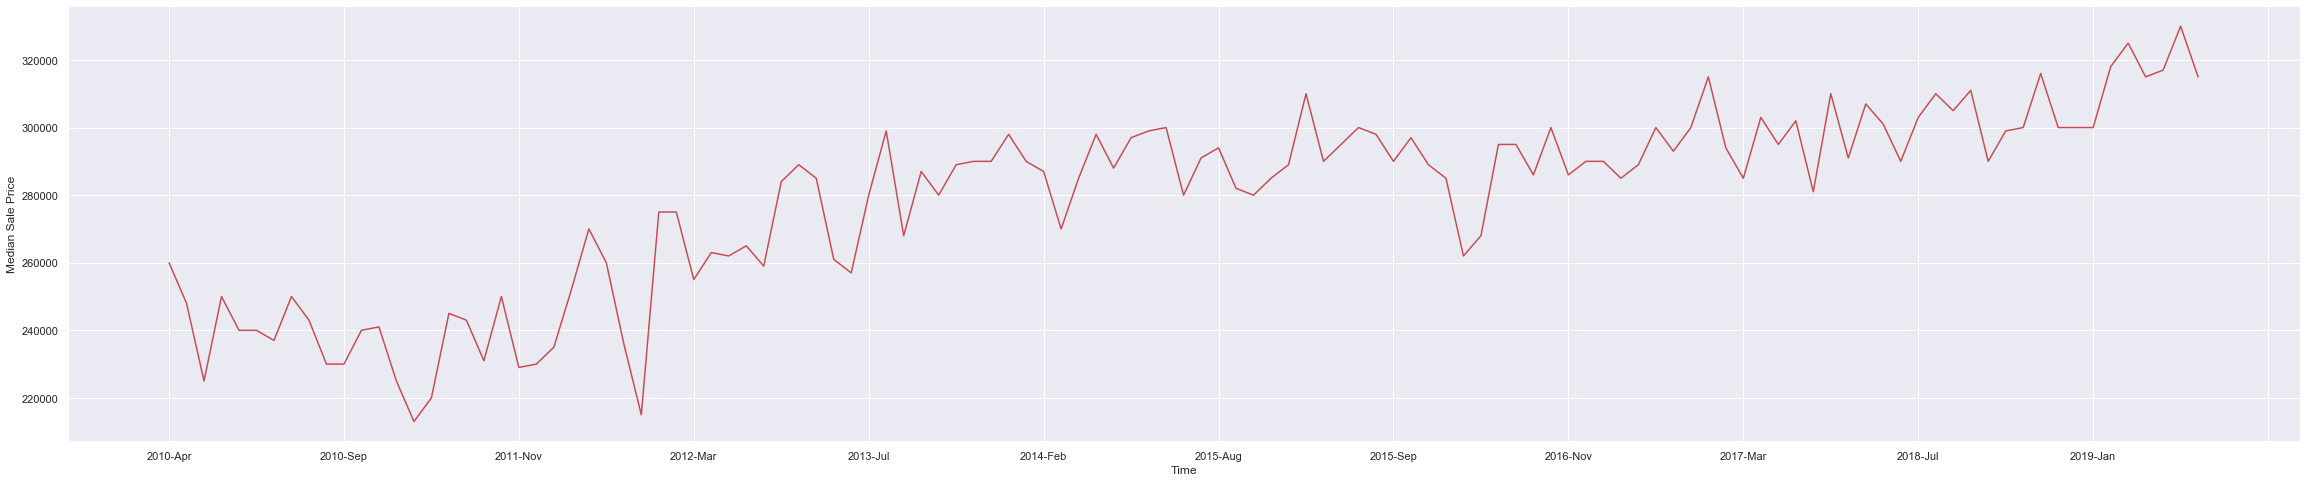

In [7]:
ax1 = sns.lineplot(x="Time", y="Median Sale Price", color = 'r', data = df)
sns.set(rc={'figure.figsize':(40,8)})
plt.xticks(range(0, 130, 10))
plt.show()

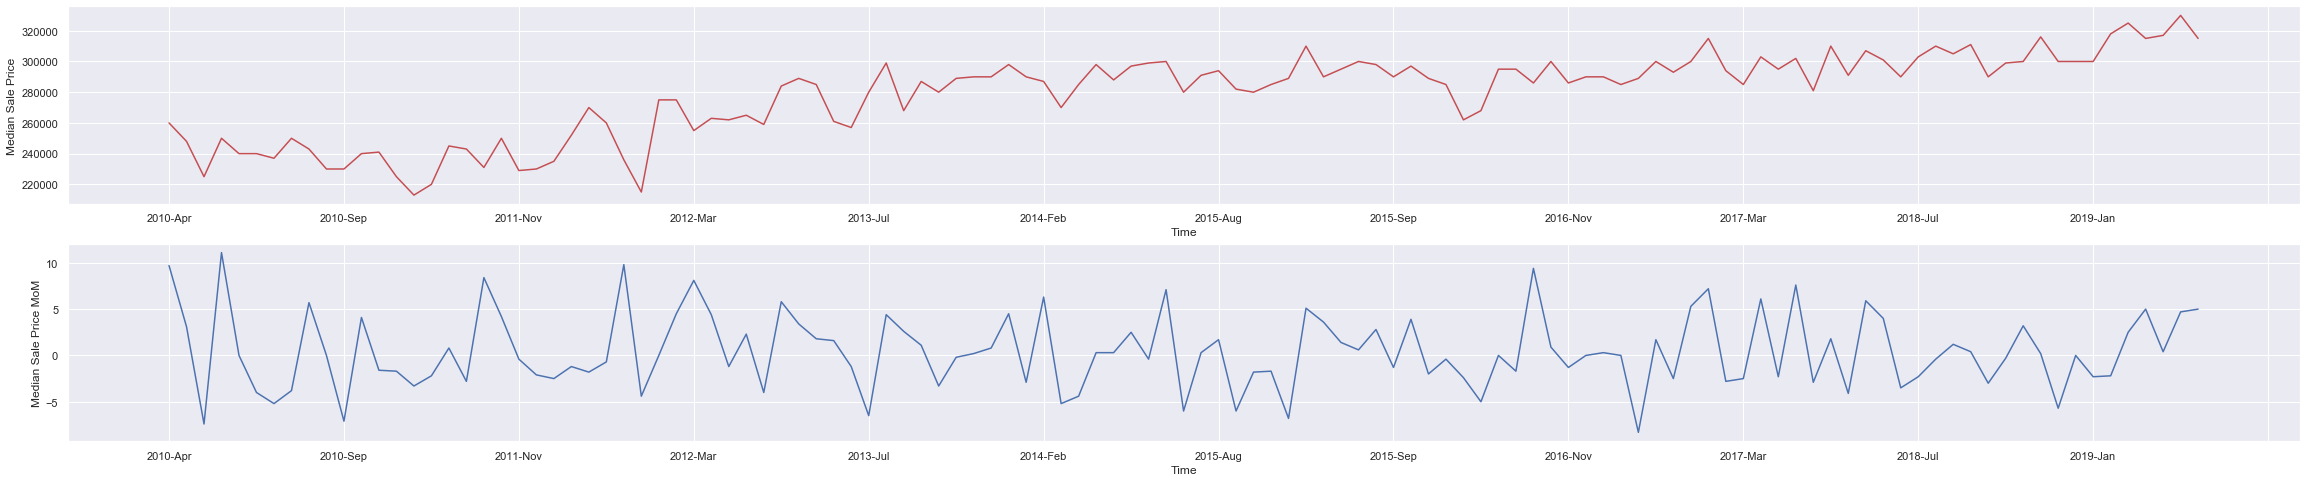

In [8]:
plt.subplot(2, 1, 1)
sns.lineplot(x = "Time", y = "Median Sale Price", data = df, color = 'r')
plt.xticks(range(0, 130, 10))
plt.subplot(2, 1, 2)
sns.lineplot(x = "Time", y = "Median Sale Price MoM", data = df)
plt.xticks(range(0, 130, 10))

sns.set(rc={'figure.figsize':(40,8)})
plt.show()

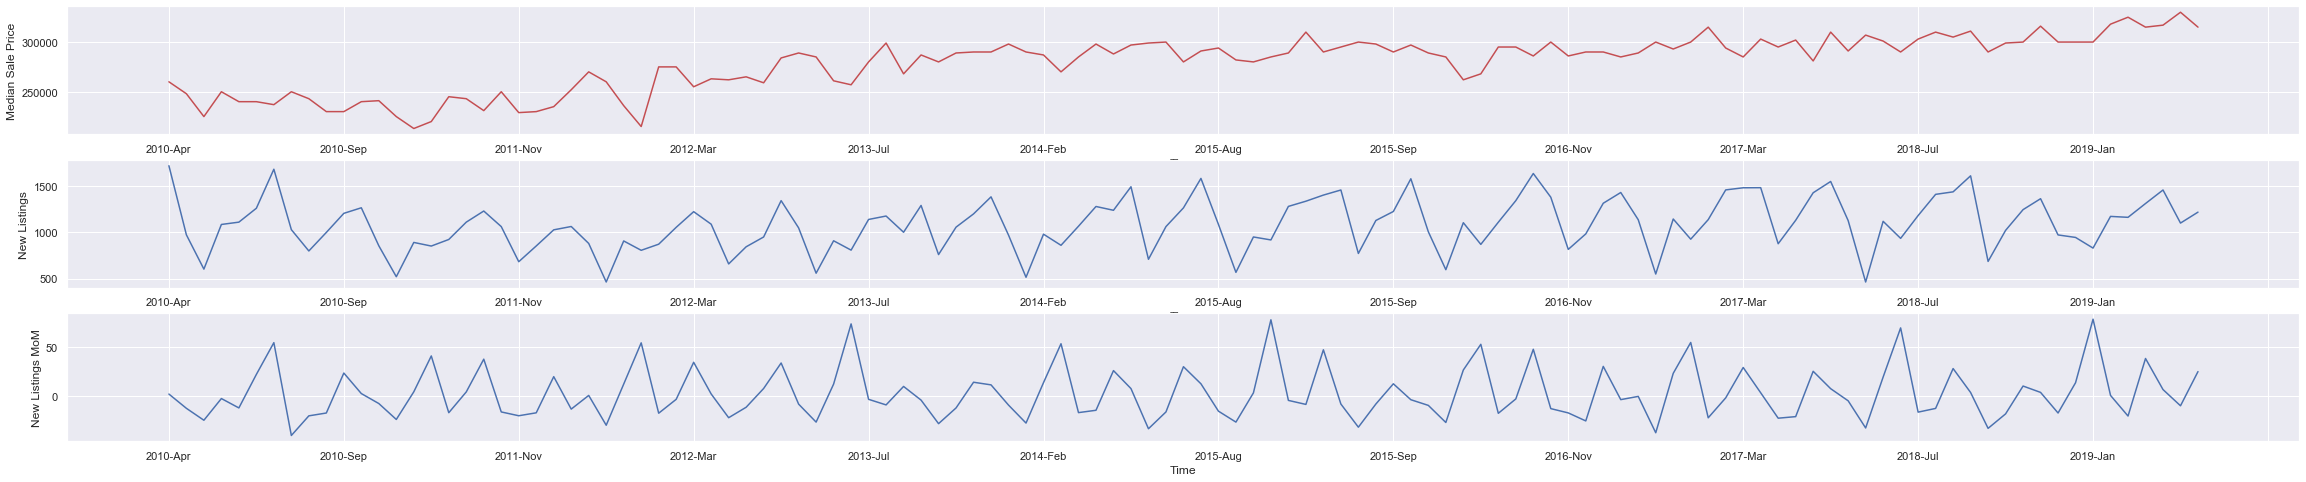

In [10]:
plt.subplot(3, 1, 1)
sns.lineplot(x = "Time", y = "Median Sale Price", data = df, color = 'r')
plt.xticks(range(0, 130, 10))
plt.subplot(3, 1, 2)
sns.lineplot(x = "Time", y = "New Listings", data = df)
plt.xticks(range(0, 130, 10))
plt.subplot(3, 1, 3)
sns.lineplot(x = "Time", y = "New Listings MoM", data = df)
plt.xticks(range(0, 130, 10))


sns.set(rc={'figure.figsize':(40,8)})
plt.show()

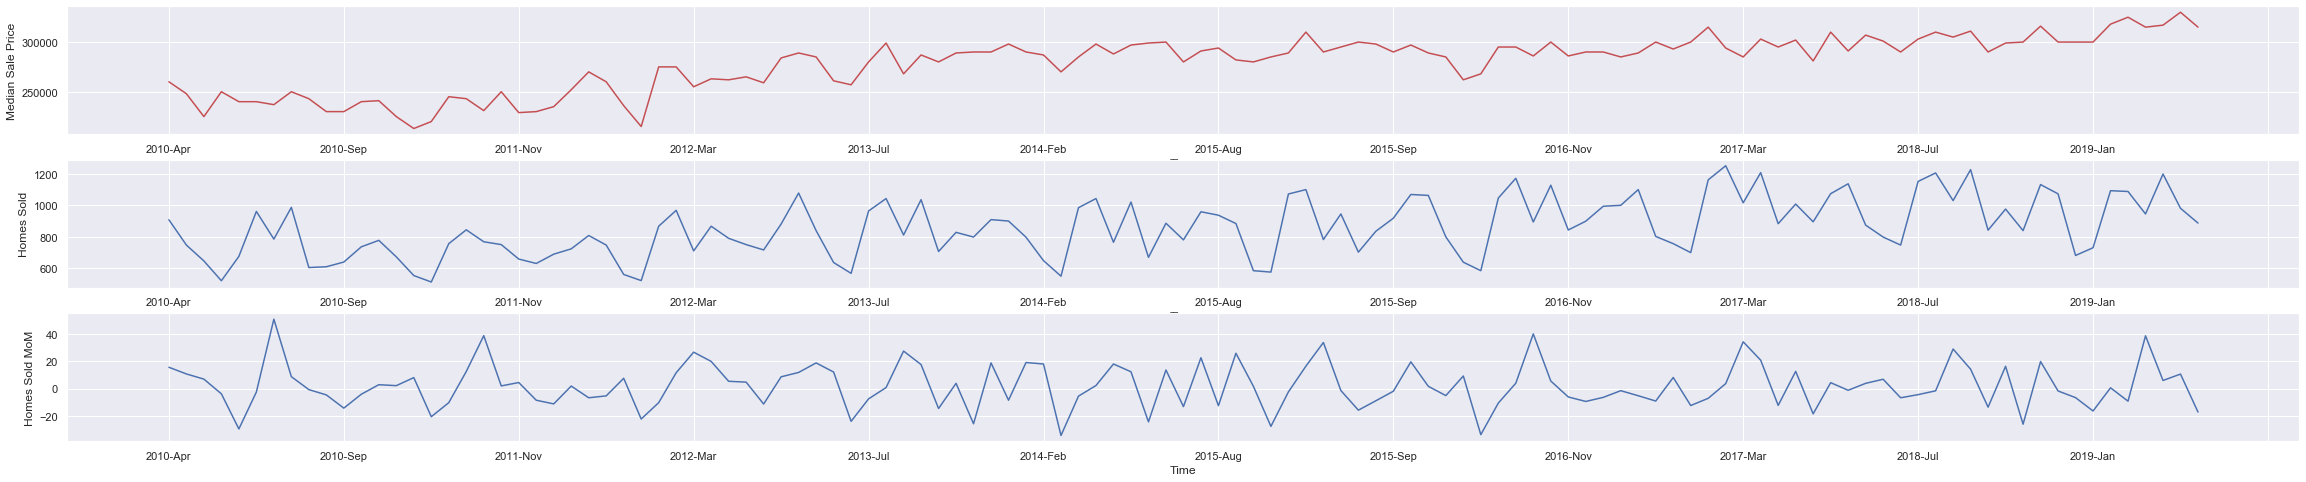

In [11]:
plt.subplot(3, 1, 1)
sns.lineplot(x = "Time", y = "Median Sale Price", data = df, color = 'r')
plt.xticks(range(0, 130, 10))
plt.subplot(3, 1, 2)
sns.lineplot(x = "Time", y = "Homes Sold", data = df)
plt.xticks(range(0, 130, 10))
plt.subplot(3, 1, 3)
sns.lineplot(x = "Time", y = "Homes Sold MoM", data = df)
plt.xticks(range(0, 130, 10))


sns.set(rc={'figure.figsize':(40,8)})
plt.show()

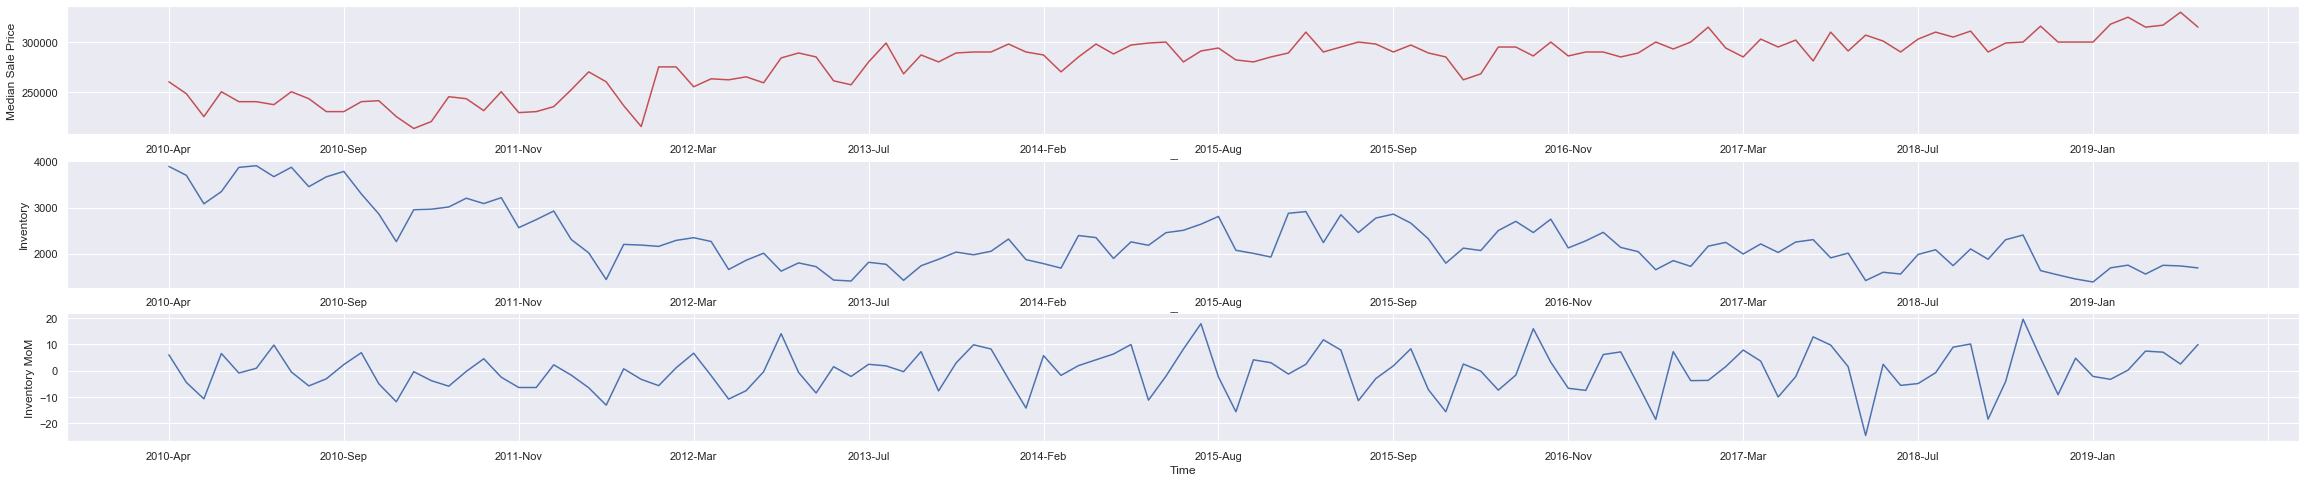

In [12]:
plt.subplot(3, 1, 1)
sns.lineplot(x = "Time", y = "Median Sale Price", data = df, color = 'r')
plt.xticks(range(0, 130, 10))
plt.subplot(3, 1, 2)
sns.lineplot(x = "Time", y = "Inventory", data = df)
plt.xticks(range(0, 130, 10))
plt.subplot(3, 1, 3)
sns.lineplot(x = "Time", y = "Inventory MoM", data = df)
plt.xticks(range(0, 130, 10))


sns.set(rc={'figure.figsize':(40,8)})
plt.show()

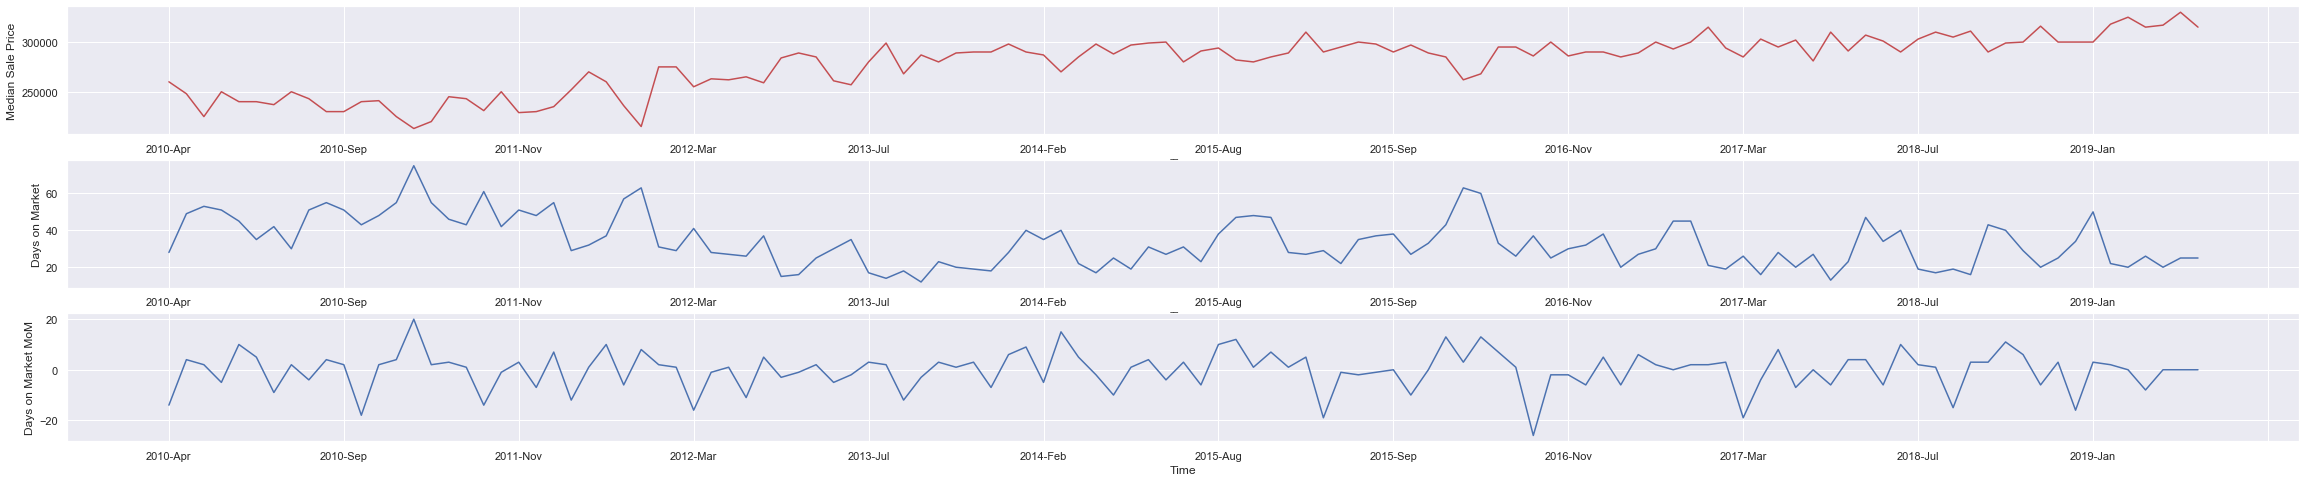

In [13]:
plt.subplot(3, 1, 1)
sns.lineplot(x = "Time", y = "Median Sale Price", data = df, color = 'r')
plt.xticks(range(0, 130, 10))
plt.subplot(3, 1, 2)
sns.lineplot(x = "Time", y = "Days on Market", data = df)
plt.xticks(range(0, 130, 10))
plt.subplot(3, 1, 3)
sns.lineplot(x = "Time", y = "Days on Market MoM", data = df)
plt.xticks(range(0, 130, 10))


sns.set(rc={'figure.figsize':(40,8)})
plt.show()

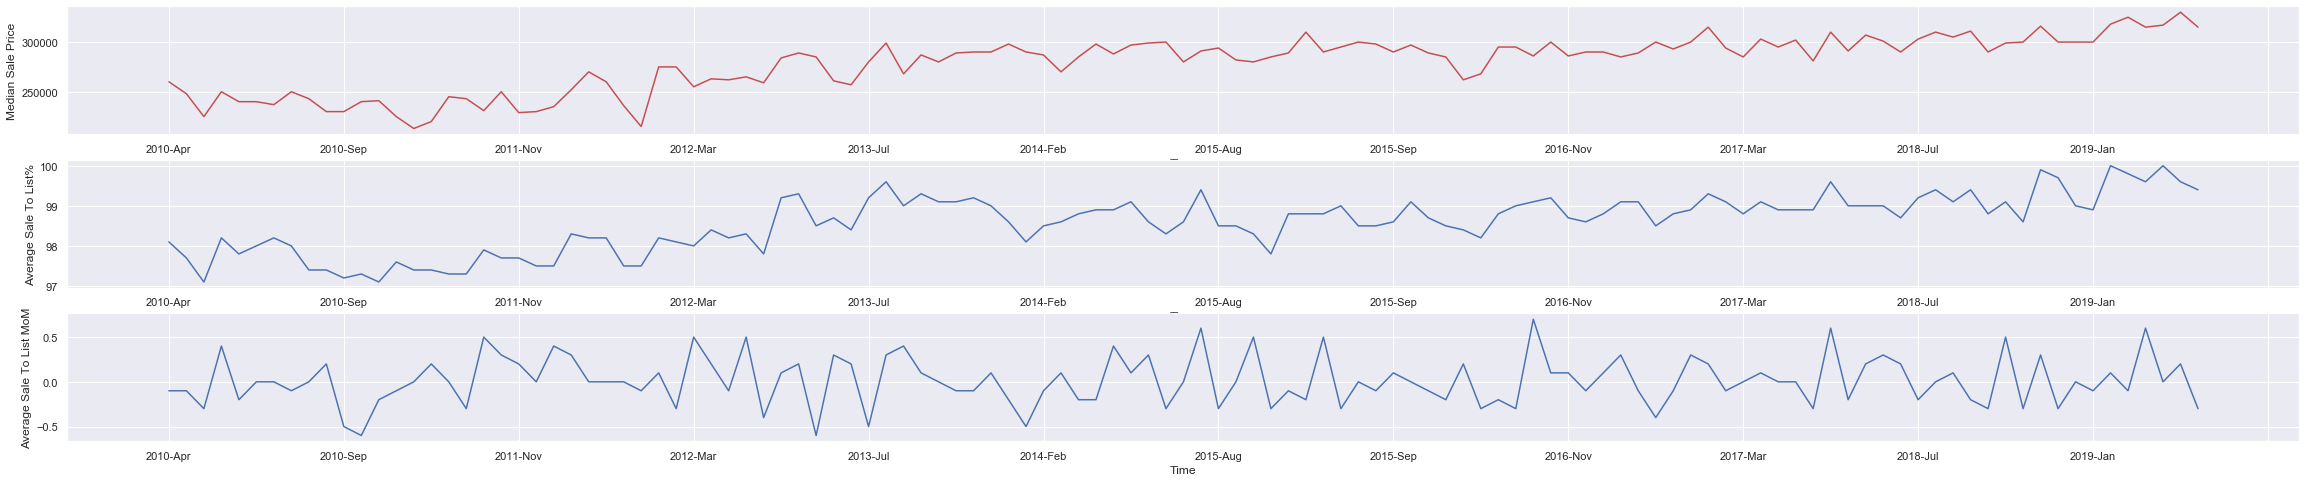

In [14]:
plt.subplot(3, 1, 1)
sns.lineplot(x = "Time", y = "Median Sale Price", data = df, color = 'r')
plt.xticks(range(0, 130, 10))
plt.subplot(3, 1, 2)
sns.lineplot(x = "Time", y = "Average Sale To List%", data = df)
plt.xticks(range(0, 130, 10))
plt.subplot(3, 1, 3)
sns.lineplot(x = "Time", y = "Average Sale To List MoM", data = df)
plt.xticks(range(0, 130, 10))


sns.set(rc={'figure.figsize':(40,8)})
plt.show()

In [ ]:
df.info()

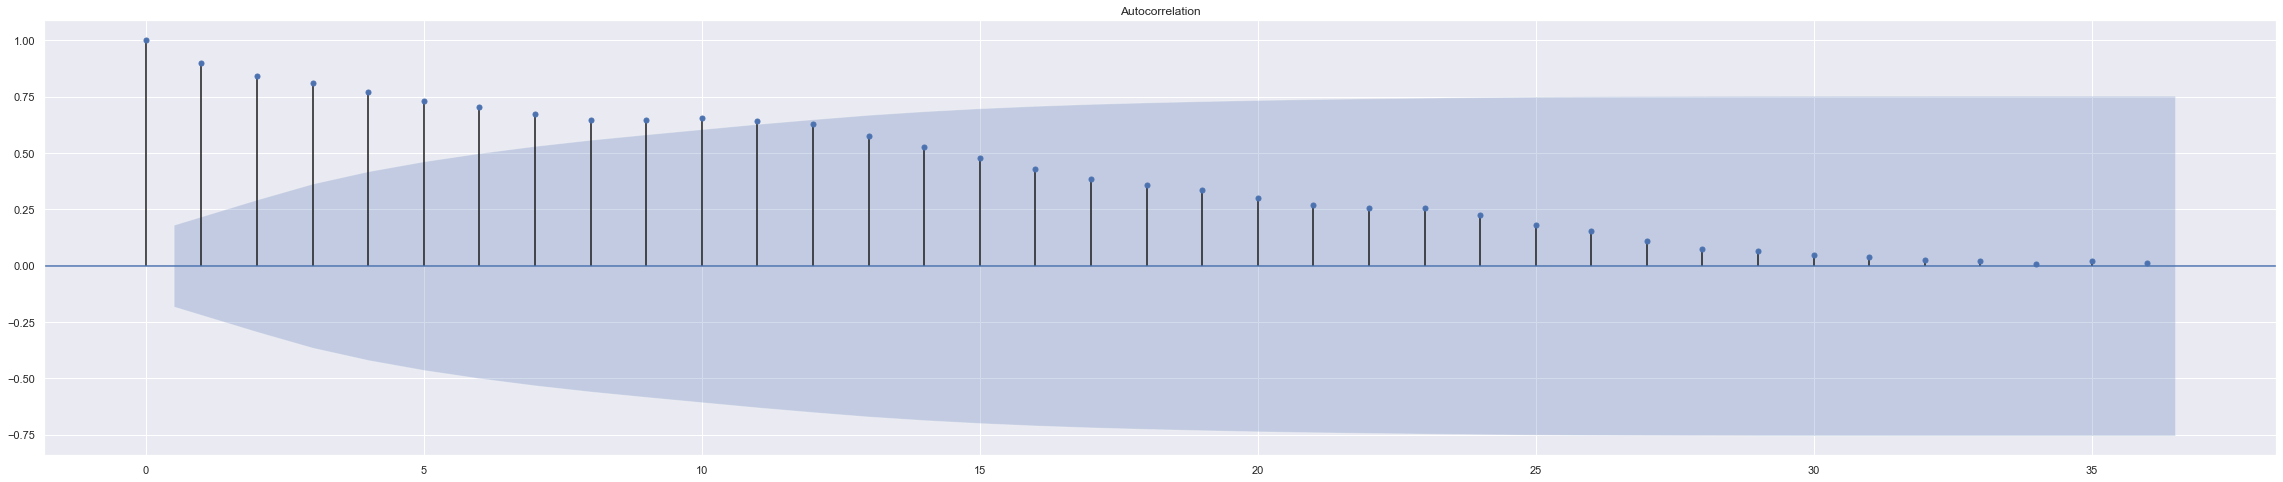

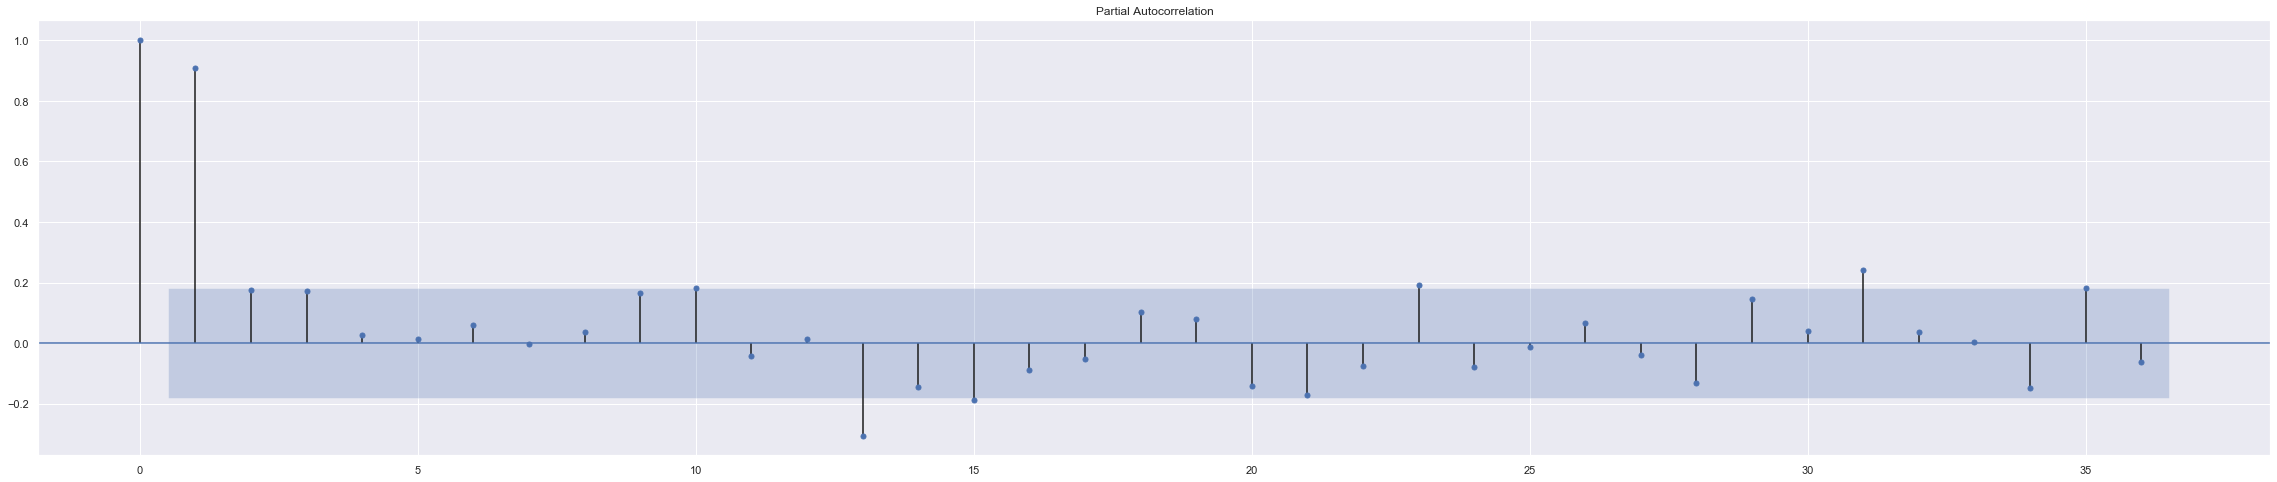

In [19]:
#plt.subplot(2, 1, 1)
plot_acf(df['Median Sale Price'], lags=36)

plot_pacf(df['Median Sale Price'], lags=36)

plt.show()

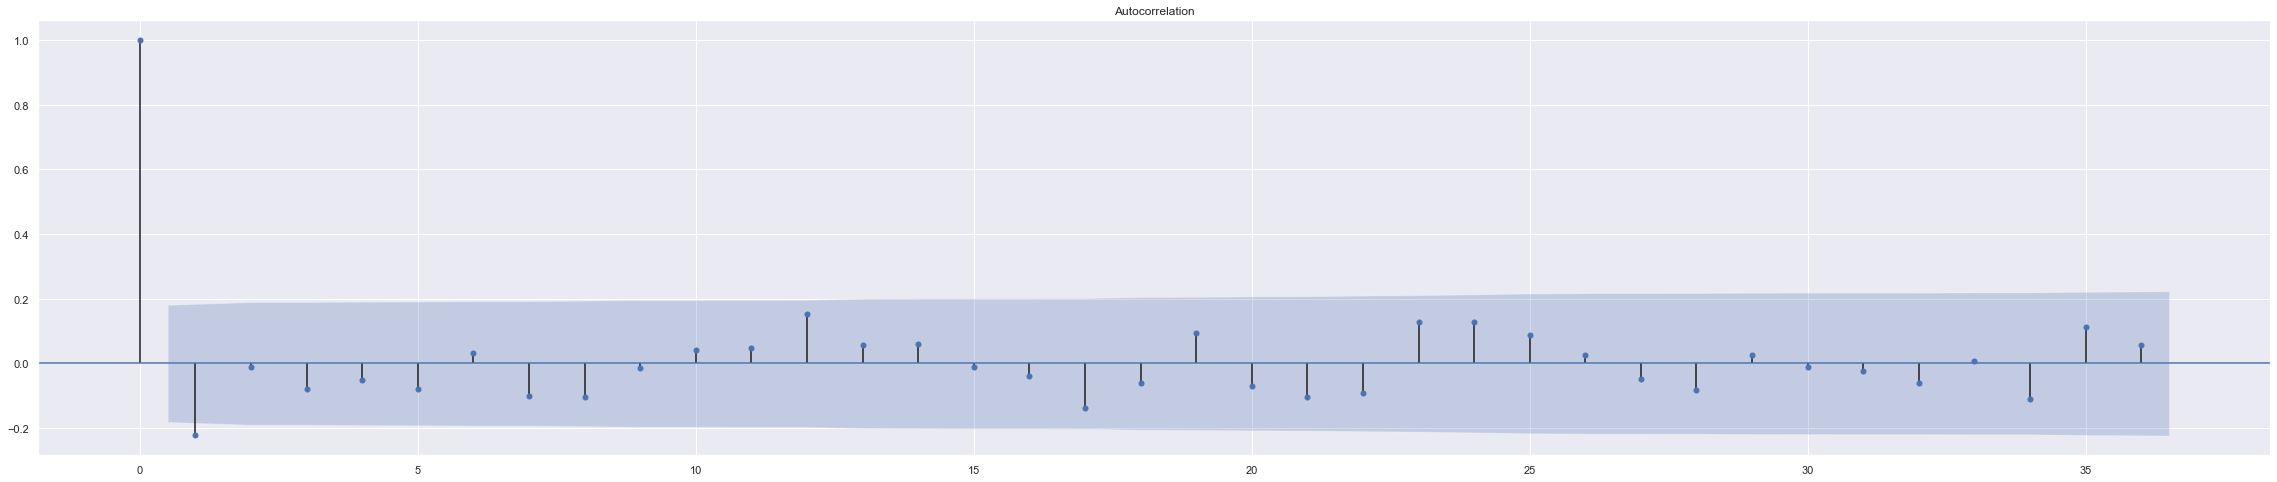

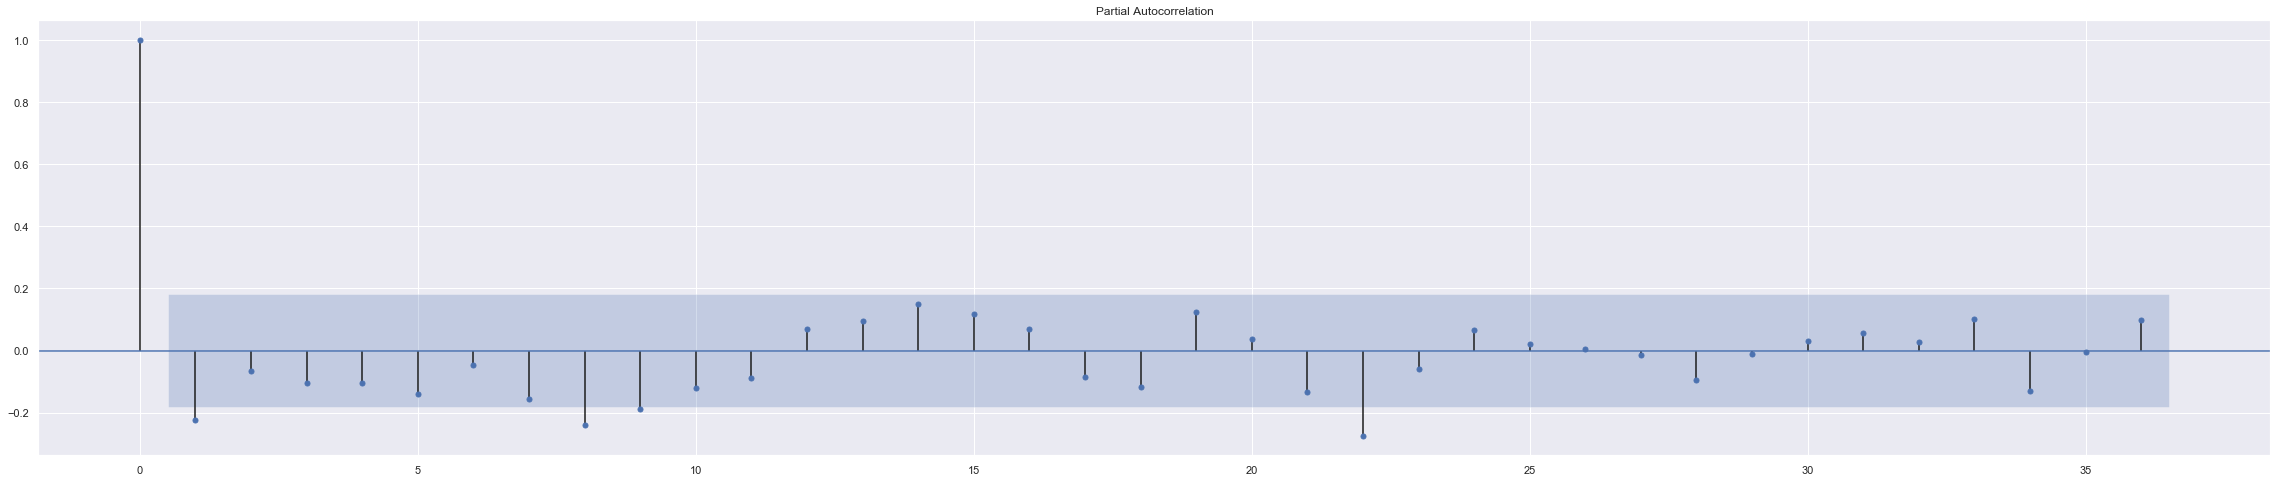

In [20]:
#plt.subplot(2, 1, 1)
plot_acf(df["Median Sale Price MoM"], lags=36)
plot_pacf(df["Median Sale Price MoM"], lags=36)

plt.show()

In [ ]:
df.head()